# Explore the public health facilities geolocation demo dataset

In [1]:
!pip install geopandas

   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------- -------------------------------- 61.4/323.6 kB 3.4 MB/s eta 0:00:01
   ------------------ --------------------- 153.6/323.6 kB 1.5 MB/s eta 0:00:01
   ------------------------------- -------- 256.0/323.6 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 323.6/323.6 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.2/16.2 MB 2.2 MB/s eta 0:00:08
    --------------------------------------- 0.2/16.2 MB 2.0 MB/s eta 0:00:09
    --------------------------------------- 0.4/16.2 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.6/16.2 MB 2.5 MB/s eta 0:00:07
   - -------------------------------------- 0.7/16.2 MB 2.6 MB/s eta 0:00:07
   - -------------------------------------- 0.7/16.2 MB 2.6 MB/s eta 0:00:07
   - ---

In [7]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Demo Health Facilities Geo Data_NHC.csv')

In [4]:
df

Facility Type   Latitude  Longitude
0        Hospital   5.593051   3.697007
1        Hospital  10.017569   9.921846
2        Hospital   7.568808  11.178651
3        Hospital  11.574567  12.594135
4        Hospital   6.093634   9.334975
..            ...        ...        ...
762      Pharmacy  11.844224   9.831699
763      Pharmacy   8.228317   8.502529
764      Pharmacy   8.162100   4.821424
765      Pharmacy   7.568452   8.388384
766      Pharmacy   4.330299  10.229440

[767 rows x 3 columns]

In [5]:
df['Facility Type'].value_counts()

Facility Type
Pharmacy                         627
Primary Care Center              118
Specialized Healthcare Center     12
Hospital                          10
Name: count, dtype: int64

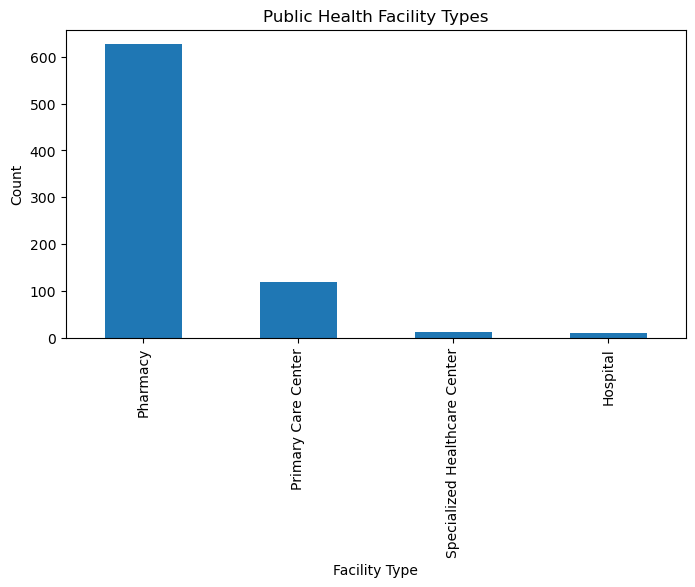

In [10]:
plt.figure(figsize=(8,4))
df['Facility Type'].value_counts().plot(kind='bar')
plt.xlabel("Facility Type")
plt.ylabel("Count")
#plt.xticks(rotation=45)
plt.title("Public Health Facility Types")
plt.show()

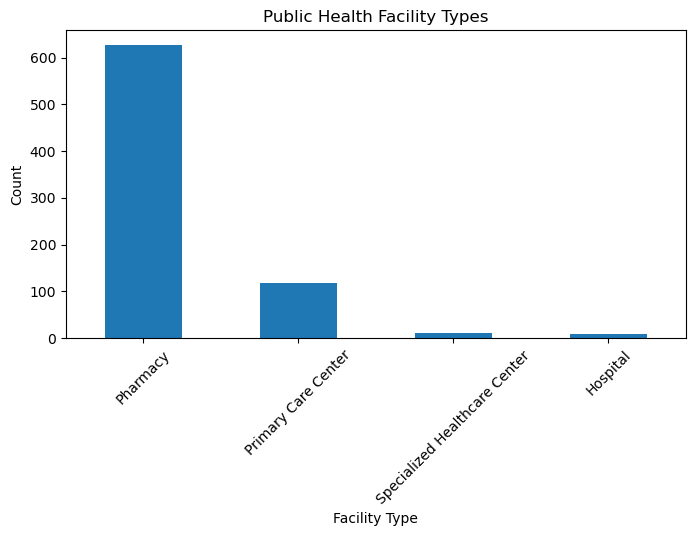

In [11]:
plt.figure(figsize=(8,4))
df['Facility Type'].value_counts().plot(kind='bar')
plt.xlabel("Facility Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Public Health Facility Types")
plt.show()

In [12]:
gdf = gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf

Facility Type   Latitude  Longitude                   geometry
0        Hospital   5.593051   3.697007    POINT (3.69701 5.59305)
1        Hospital  10.017569   9.921846   POINT (9.92185 10.01757)
2        Hospital   7.568808  11.178651   POINT (11.17865 7.56881)
3        Hospital  11.574567  12.594135  POINT (12.59413 11.57457)
4        Hospital   6.093634   9.334975    POINT (9.33497 6.09363)
..            ...        ...        ...                        ...
762      Pharmacy  11.844224   9.831699    POINT (9.8317 11.84422)
763      Pharmacy   8.228317   8.502529    POINT (8.50253 8.22832)
764      Pharmacy   8.162100   4.821424     POINT (4.82142 8.1621)
765      Pharmacy   7.568452   8.388384    POINT (8.38838 7.56845)
766      Pharmacy   4.330299  10.229440    POINT (10.22944 4.3303)

[767 rows x 4 columns]

<Axes: >

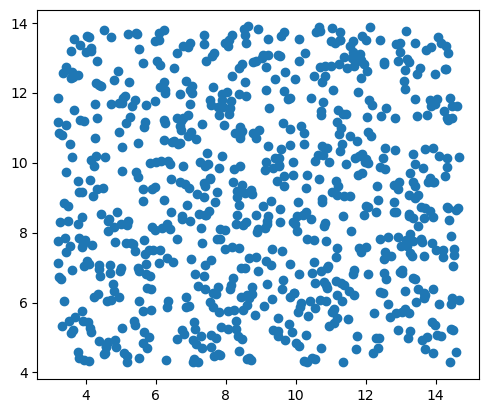

In [13]:
gdf.plot()

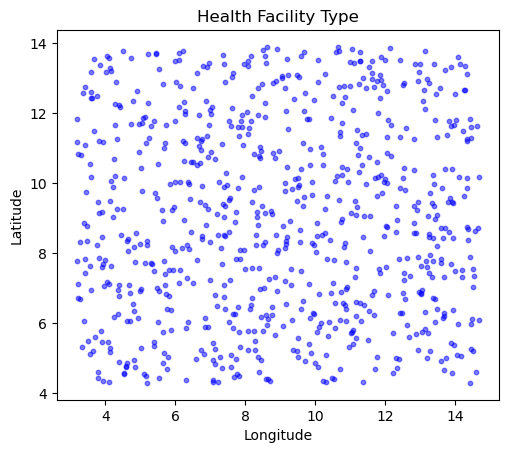

In [14]:
gdf.plot(markersize=10,color='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Health Facility Type')
plt.show()

In [15]:
buffers = gdf.copy()
buffers['geometry'] = gdf.buffer(0.10)

<Axes: >

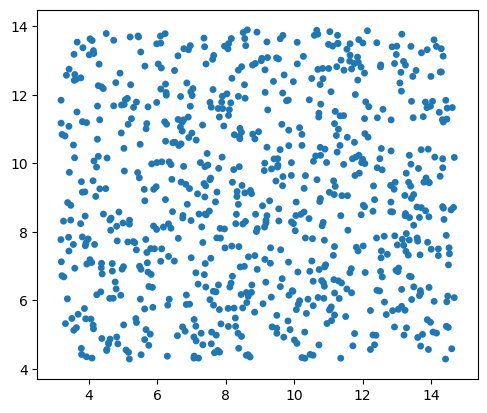

In [16]:
buffers.plot()

<Axes: >

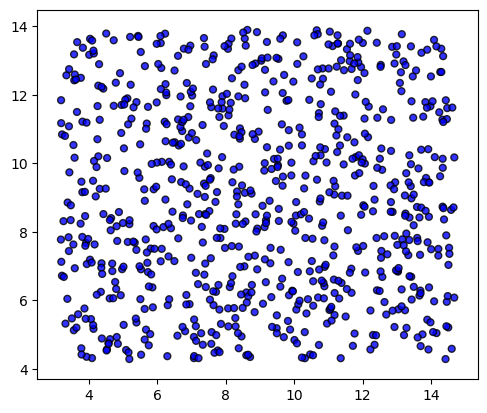

In [17]:
buffers.plot(color='blue', edgecolor='k', alpha=0.8)

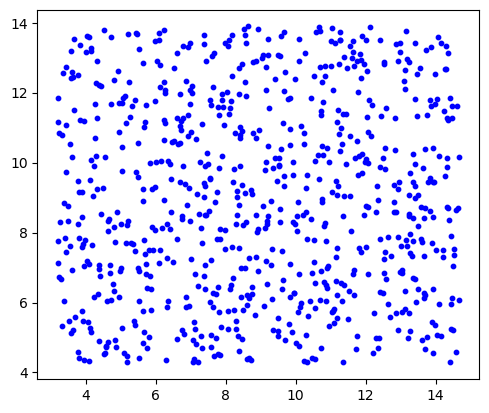

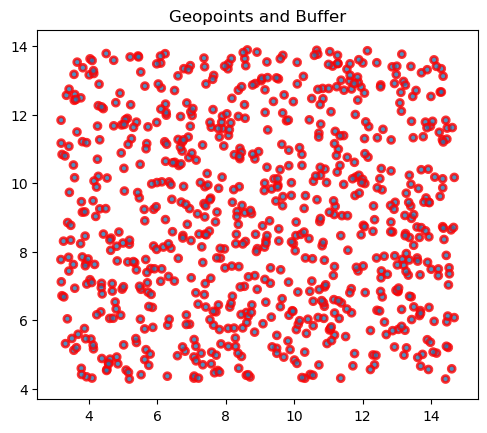

In [18]:
gdf.plot(color='blue', markersize=10, label="Geopoints")
buffers.plot(edgecolor="red", linewidth=2,label="Buffers", alpha=0.8)
plt.title("Geopoints and Buffer")
plt.show()

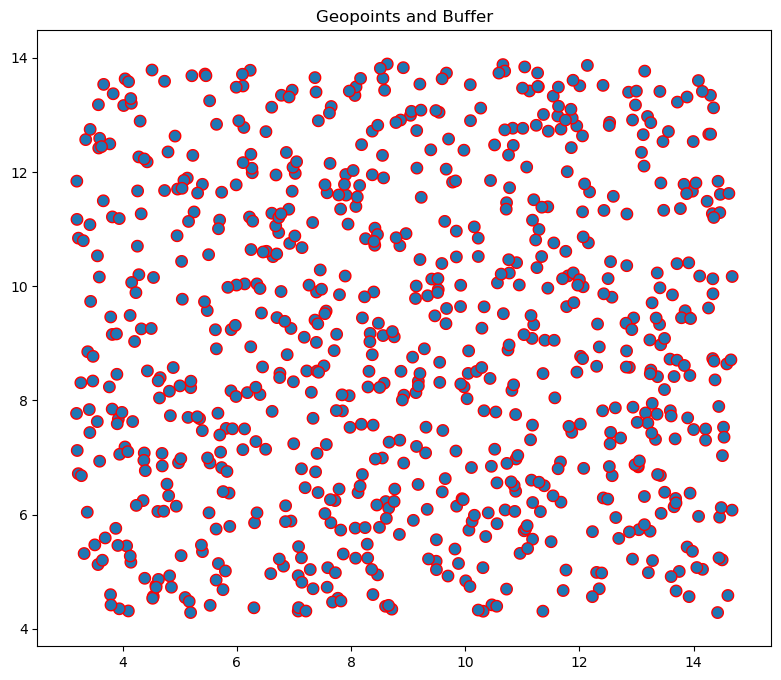

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
gdf.plot(ax=ax,color='blue', markersize=4,label="Geopoints")
buffers.plot(ax=ax, edgecolor='red', linewidth=1,label='Buffers')
#plt.legend()
plt.title("Geopoints and Buffer")
plt.show()

# Interactive Maps

In [26]:
!pip install folium
import folium

In [27]:
df['Facility Type'].unique()

array(['Hospital', 'Primary Care Center', 'Specialized Healthcare Center',
       'Pharmacy'], dtype=object)

In [29]:
m = folium.Map(location=[df['Latitude'].iloc[0], df['Longitude'][0]])
for index,row in df.iterrows():
    folium.Marker([row['Latitude'],row['Longitude']], popup=row['Facility Type']).add_to(m)
m

In [30]:
facility_color_mapping = {'Hospital':'red', 'Primary Care Center':'blue','Specialized Healthcare Center':'green','Pharmacy':'purple'}

In [33]:
# Lets spevify the color of each facility type

m = folium.Map(location=[df['Latitude'].iloc[0], df['Longitude'][0]])
for index, row in df.iterrows():
    facility_type = row['Facility Type']
    if facility_type in facility_color_mapping:
        color = facility_color_mapping[facility_type]
    else:
        color = 'gray'
    folium.Marker(location=[row['Latitude'],row['Longitude']],popup=row['Facility Type'], icon=folium.Icon(color=color)).add_to(m)

In [32]:
m

In [34]:
df['Facility Type'].nunique()

4

In [35]:
df['Facility Type'].unique()

array(['Hospital', 'Primary Care Center', 'Specialized Healthcare Center',
       'Pharmacy'], dtype=object)

In [38]:
# filter specific facility
m = folium.Map(location=[df['Latitude'].iloc[0], df['Longitude'].iloc[0]])
facility_types_to_visualize = ['Hospital','Pharmacy']
filtered_df = df[df['Facility Type'].isin(facility_types_to_visualize)]

for index, row in filtered_df.iterrows():
    facility_type = row['Facility Type']
    color = facility_color_mapping.get(facility_type,'gray')
    folium.Marker(location=[row['Latitude'],row['Longitude']], popup=row['Facility Type'], icon=folium.Icon(color=color)).add_to(m)

m

# Heatmaps and Marker Clusters

In [43]:
m = folium.Map(location=[df['Latitude'].iloc[0],df['Longitude'].iloc[0]])

In [45]:
heat_data = [[row['Latitude'], row['Longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

m

In [46]:
m.save('facility_heatmap.html')

In [47]:
from folium.plugins import MarkerCluster

In [48]:
m = folium.Map(location=[df['Latitude'].iloc[0],df['Longitude'].iloc[0]])

In [49]:
marker_cluster = MarkerCluster()

In [51]:
for index, row in df.iterrows():
    marker = folium.Marker([row['Latitude'],row['Longitude']], popup=row['Facility Type'])
    marker.add_to(marker_cluster)

marker_cluster.add_to(m)
m